In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import norm,skew

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import xgboost as xgb

#dataset link
#https://archive.ics.uci.edu/dataset/9/auto+mpg

import warnings
warnings.filterwarnings('ignore')

In [2]:
column_name=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
df=pd.read_csv('auto-mpg.data',names=column_name,sep=' ', na_values='unknown',comment='\t',skipinitialspace=True)
df=df.rename(columns={'mpg':'Fuel_consumption'})

In [3]:
df.head()

,Fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.describe()

,Fuel_consumption,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:

df.info()  # there is no missing value no need imputing.
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce') # ı was having problem with pairplot due to the  datatype of horsepower. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_consumption  398 non-null    float64
 1   cylinders         398 non-null    int64  
 2   displacement      398 non-null    float64
 3   horsepower        398 non-null    object 
 4   weight            398 non-null    float64
 5   acceleration      398 non-null    float64
 6   model_year        398 non-null    int64  
 7   origin            398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [6]:
df.info()  #there are missing values because of pd.to_numeric Func

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_consumption  398 non-null    float64
 1   cylinders         398 non-null    int64  
 2   displacement      398 non-null    float64
 3   horsepower        392 non-null    float64
 4   weight            398 non-null    float64
 5   acceleration      398 non-null    float64
 6   model_year        398 non-null    int64  
 7   origin            398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
#handling missing values due to changing object datatype into float
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())

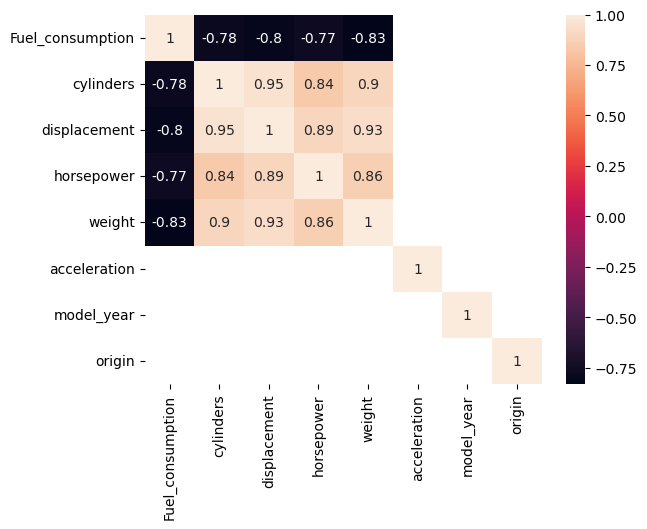

In [8]:
#EDA
sns.heatmap(df.corr()[(df.corr()>0.7) | (df.corr()<-0.7)]
            ,annot=True) #correlation heatmap 
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fuel_consumption  398 non-null    float64
 1   cylinders         398 non-null    int64  
 2   displacement      398 non-null    float64
 3   horsepower        398 non-null    float64
 4   weight            398 non-null    float64
 5   acceleration      398 non-null    float64
 6   model_year        398 non-null    int64  
 7   origin            398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


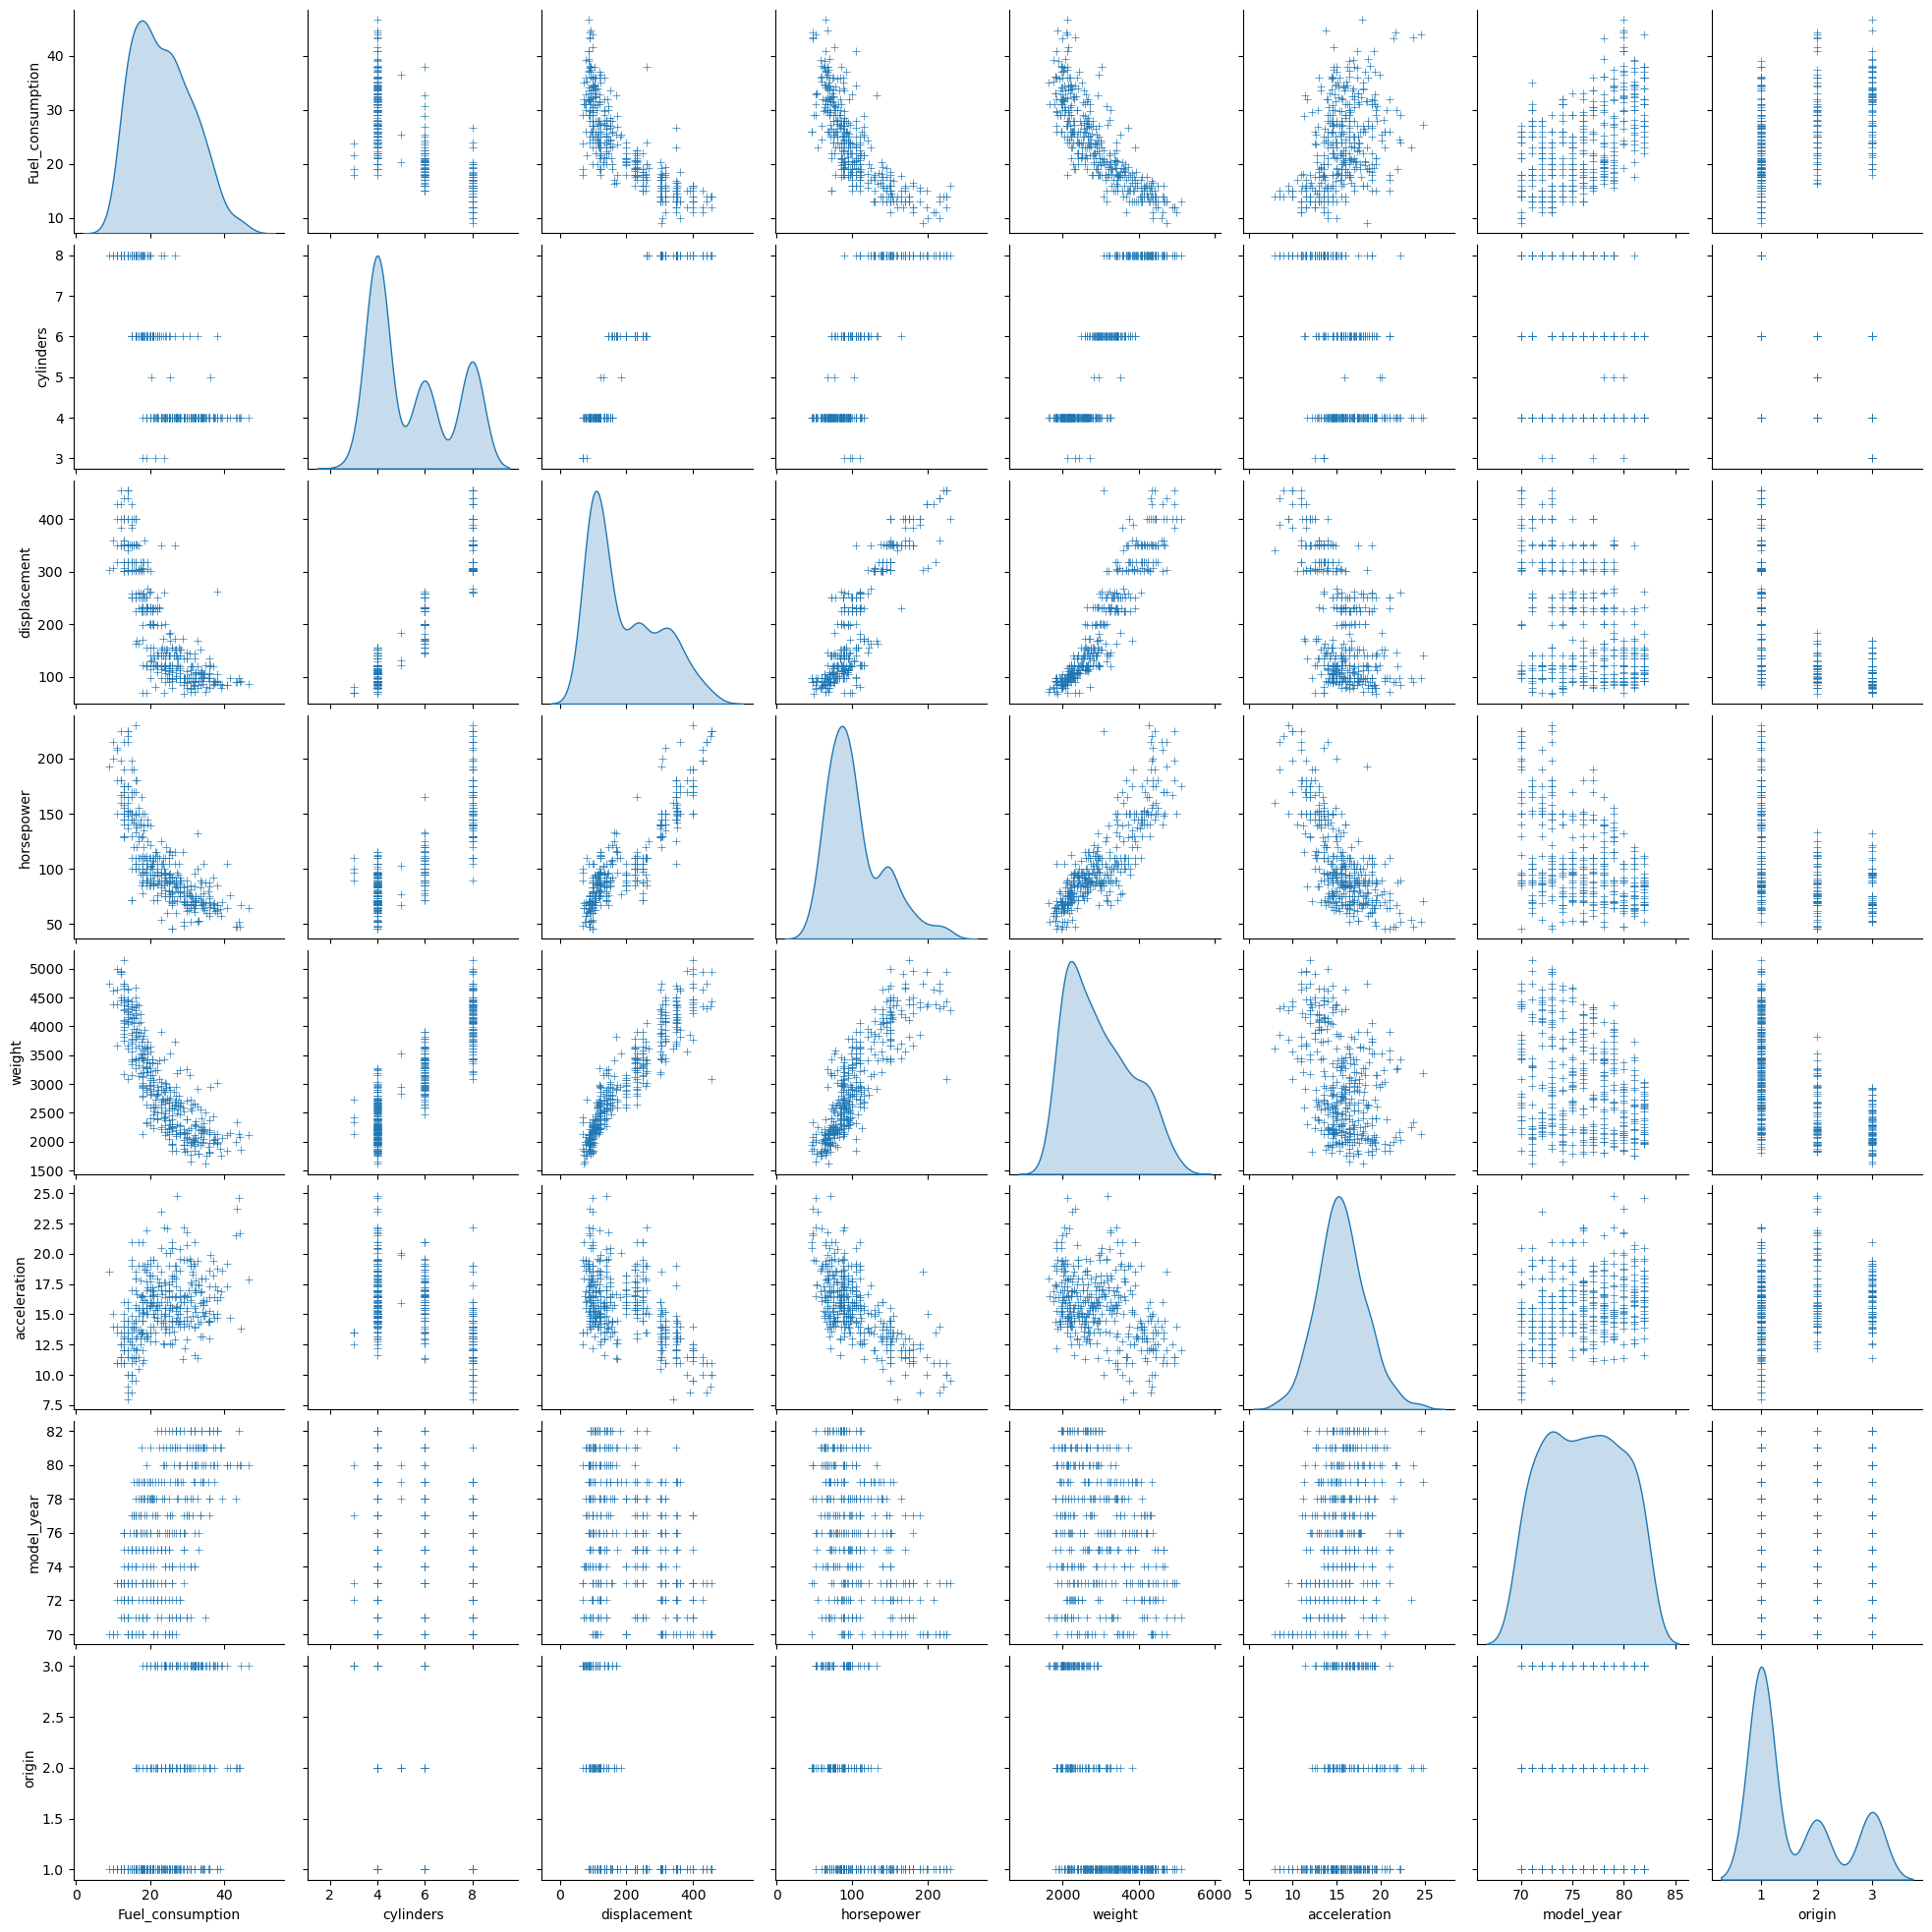

In [10]:
#visualization
sns.pairplot(df,diag_kind='kde',markers='+')
plt.show()

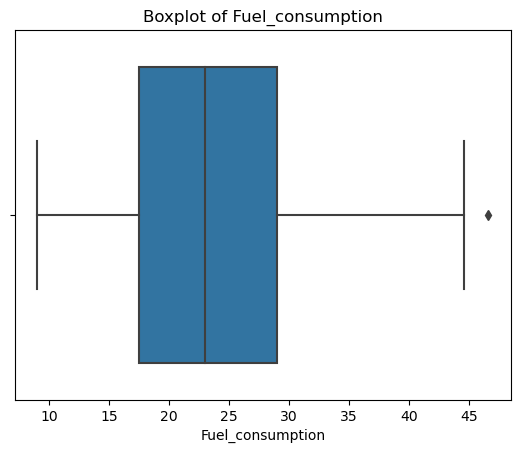

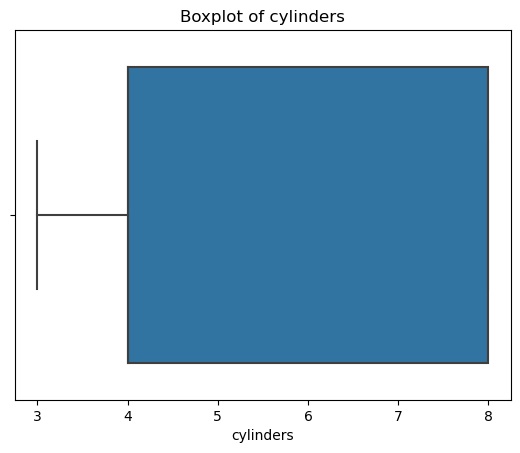

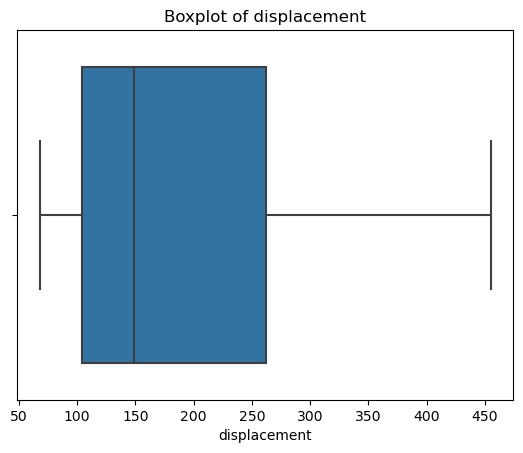

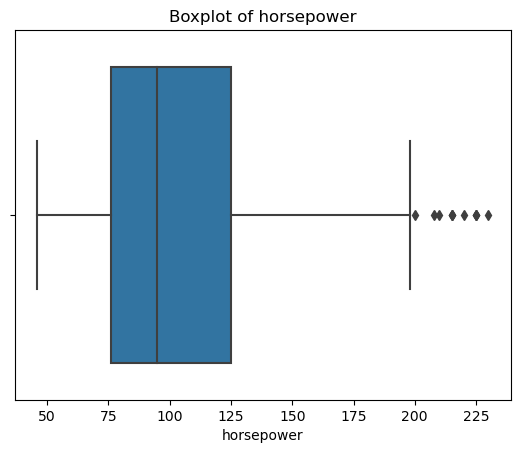

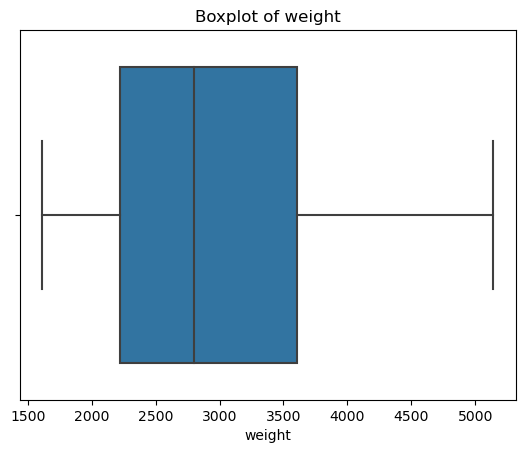

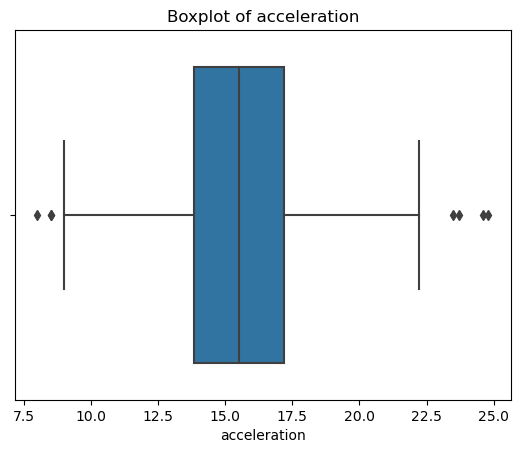

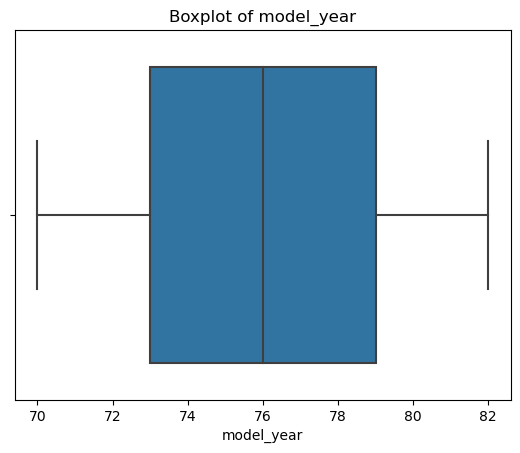

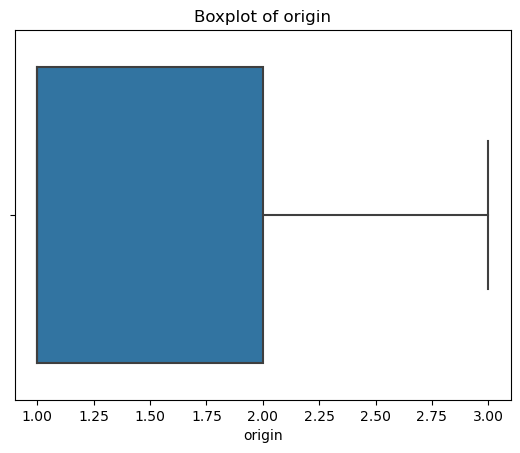

In [11]:
for c in df.columns:
    sns.boxplot(data=df,x=c, orient='h')
    plt.title(f"Boxplot of {c}")
    plt.show()


In [12]:
"""thr=2
horsepower_desc=df['horsepower'].describe()
q3=horsepower_desc[6]
q1=horsepower_desc[4]
ıqr_hp=q3-q1
top_limit=q3 + thr*ıqr_hp
bot_limit=q1 - thr*ıqr_hp
filter_hp_bot=bot_limit < df['horsepower']
filter_hp_top=df['horsepower'] < top_limit
filter_hp=filter_hp_bot & filter_hp_top
df=df[filter_hp]

acceleration_desc=df['acceleration'].describe()
q3=acceleration_desc[6]
q1=acceleration_desc[4]
ıqr_hp=q3-q1
top_limit=q3 + thr*ıqr_hp
bot_limit=q1 - thr*ıqr_hp
filter_hp_bot=bot_limit < df['acceleration']
filter_hp_top=df['acceleration'] < top_limit
filter_hp=filter_hp_bot & filter_hp_top
df=df[filter_hp]
"""
    # I tried to remove outlier but decreased accuracy score for learning models so ı decided not to use.

"thr=2\nhorsepower_desc=df['horsepower'].describe()\nq3=horsepower_desc[6]\nq1=horsepower_desc[4]\nıqr_hp=q3-q1\ntop_limit=q3 + thr*ıqr_hp\nbot_limit=q1 - thr*ıqr_hp\nfilter_hp_bot=bot_limit < df['horsepower']\nfilter_hp_top=df['horsepower'] < top_limit\nfilter_hp=filter_hp_bot & filter_hp_top\ndf=df[filter_hp]\n\nacceleration_desc=df['acceleration'].describe()\nq3=acceleration_desc[6]\nq1=acceleration_desc[4]\nıqr_hp=q3-q1\ntop_limit=q3 + thr*ıqr_hp\nbot_limit=q1 - thr*ıqr_hp\nfilter_hp_bot=bot_limit < df['acceleration']\nfilter_hp_top=df['acceleration'] < top_limit\nfilter_hp=filter_hp_bot & filter_hp_top\ndf=df[filter_hp]\n"

In [14]:
#one hot encoding for cylinders and origin bcs they have categorical value
df['cylinders']=df['cylinders'].astype(str)
df['origin']=df['origin'].astype(str)
pd.get_dummies(df)


,Fuel_consumption,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
394,44.0,97.0,52.0,2130.0,24.6,82,0,1,0,0,0,0,1,0
395,32.0,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,28.0,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


In [15]:
#train test split and standardization
X=df.drop(['Fuel_consumption'],axis=1)
y=df['Fuel_consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)


r2_lr=r2_score(y_test,y_pred)

print(mse)
print(f"R-squared score is for linear regression:{r2_lr}")


9.278723220932973
R-squared score is for linear regression:0.8383254449415627


In [17]:
xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)

#mse and r2 score
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("R-squared (XGBoost):", r2_xgb)

Mean Squared Error (XGBoost): 7.553225178763707
R-squared (XGBoost): 0.8683909099392212


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # last layer
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)



test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
print("\nTest Seti:")
print("MSE:", test_mse)
print("R-squared:", test_r2)



Epoch 1/100

9/9 [==============================] - 1s 2ms/step - loss: 606.4769
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 588.5439
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 566.2644
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 534.9261
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 488.7750
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 422.7173
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 331.0172
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 218.7745
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 115.0543
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 58.9602
Epoch 11/100
9/9 [==============================] - 0s 1ms/step - loss: 48.6003
Epoch 12/100
9/9 [==============================] - 0s 1ms/step - loss: 40.7409
Epoch 13/100
9/9 [===================

In [19]:
rf=RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

#r2 score
mse=mean_squared_error(y_test,y_pred)

r2_rf=r2_score(y_test,y_pred)

print(f"Random forest's Mse is :{mse}")
print(f"Random Forest score is :{r2_rf}")

Random forest's Mse is :6.2647983583333335
Random Forest score is :0.8908407479135338


In [20]:
#Printing results
print(f'Linear regression model is:{r2_lr }')
print(f'Xgboost model is:{r2_xgb }')
print(f'Sequential model is:{test_r2 }')
print(f'Random forest model is:{r2_rf}')


Linear regression model is:0.8383254449415627
Xgboost model is:0.8683909099392212
Sequential model is:0.8788029759646513
Random forest model is:0.8908407479135338
